# Neural Networks Project

## Context:

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geolocated patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.  
<br>
More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.  
<br>
In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.  

## Data Description:

**The Street View House Numbers (SVHN) Dataset**  
<br>
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.  
Download from here: https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

## Objective: 

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network.

In [9]:
# Import necessary libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow import keras

warnings.filterwarnings("ignore", category=UserWarning)

In [10]:
# Read the file, load train, test sets
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

X_train, y_train = h5f['X_train'][:], h5f['y_train'][:]
X_test, y_test = h5f['X_test'][:], h5f['y_test'][:]

h5f.close()

## Data Exploration:

In [11]:
# Examine the train and test sets

print(f"No. of image samples in Train set: {len(X_train)}")
print(f"No. of image samples in Test set: {len(X_test)}")

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

No. of image samples in Train set: 42000
No. of image samples in Test set: 18000
Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


Label: 6


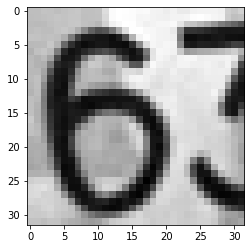

In [12]:
# Visualize the images

plt.imshow(X_train[1], cmap='gray')
print(f"Label: {y_train[1]}")

#### We one-hot encode our class labels as our NN model will use softmax function to give class probabilities

In [13]:
from tensorflow.keras.utils import to_categorical

print(f"Label value before encoding: {y_train[1]}")

# We have labels from 0-9, hence num_classes=10
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Label value after encoding: {y_train[1]}")

Label value before encoding: 6
Label value after encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Define Model structure:

#### We will use a sequential model with following layers (in order):  
  * **Input layer:** We will reshape our input from 32x32 (2D) to 1024 (1D). Hence, our input layer will have **1024** neurons  
  * **Batch normalization layer:** This layer normalizes the value at each image pixel wrt a particular batch. Hence in a batch, the values will be normally distributed  
  * **Hidden layer 1:** This is our 1st hidden layer with 'ReLU' activation. It will have **400** neurons  
  * **Hidden layer 2:** This is our 2nd hidden layer with 'ReLU' activation. It will have **250** neurons
  * **Dropout layer 1:** This is our 1st dropout layer which is introduced to reduce overfitting and bring in some regularization. We will start with dropout rate of **0.5**  
  * **Hidden layer 3:** This is our 3rd hidden layer with 'ReLU' activation. It will have **150** neurons  
  * **Hidden layer 4:** This is our 4th hidden layer with 'ReLU' activation. It will have **100** neurons  
  * **Dropout layer 2:** This is our 2nd dropout layer which is introduced to further reduce overfitting and bring in some regularization. We will use dropout rate of **0.5**
  * **Hidden layer 5:** This is our 5th hidden layer with 'ReLU' activation. It will have **60** neurons  
  * **Hidden layer 6:** This is our 6th hidden layer with 'ReLU' activation. It will have **30** neurons  
  * **Dropout layer 3:** This is our 3rd dropout layer which is introduced to further reduce overfitting and bring in some regularization. We will use dropout rate of **0.3**
  * **Output layer:** This is our output layer which will have **10** neurons (one each for a class label) and will have **softmax** activation which will give us class probabilities 

We will use **adam** optimizer with **Cross Entropy** for loss function. We will use **Accuracy** to measure model performance  

## Building the model:

In [46]:
# Fix the seed for random number generator
import random
random.seed(42)

In [47]:
# Initialize Sequential model
nn_model = keras.models.Sequential(name='ANN')

# Input layer: Reshape data from 2D to 1D -> 32x32 to 1024
nn_model.add(keras.layers.Reshape((1024,),input_shape=(32,32,), name='Input_Layer'))

# Batch normalization layer
nn_model.add(keras.layers.BatchNormalization(name='Batch_Normalization_Layer'))

# Hidden layers 1 and 2
nn_model.add(keras.layers.Dense(400, activation='relu', name='Hidden_Layer_1'))
nn_model.add(keras.layers.Dense(250, activation='relu', name='Hidden_Layer_2'))

# Dropout layer 1
nn_model.add(keras.layers.Dropout(0.5, name='Dropout_Layer_1'))

# Hidden layers 3 and 4
nn_model.add(keras.layers.Dense(150, activation='relu', name='Hidden_Layer_3'))
nn_model.add(keras.layers.Dense(100, activation='relu', name='Hidden_Layer_4'))

# Dropout layer 2
nn_model.add(keras.layers.Dropout(0.5, name='Dropout_Layer_2'))

# Hidden layers 5 and 6
nn_model.add(keras.layers.Dense(60, activation='relu', name='Hidden_Layer_5'))
nn_model.add(keras.layers.Dense(30, activation='relu', name='Hidden_Layer_6'))

# Dropout layer 3
nn_model.add(keras.layers.Dropout(0.3, name='Dropout_Layer_3'))

#Output layer
nn_model.add(keras.layers.Dense(10, activation='softmax', name='Output_Layer'))

In [48]:
# Specify optimizer, loss function and evaluation metrics for the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Print the model Summary
nn_model.summary()

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
Batch_Normalization_Layer (B (None, 1024)              4096      
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 400)               410000    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 250)               100250    
_________________________________________________________________
Dropout_Layer_1 (Dropout)    (None, 250)               0         
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 150)               37650     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 100)               15100   

### We will now train the model for 100 epochs

In [50]:
nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 500)

Epoch 1/100
84/84 [==============================] - 6s 71ms/step - loss: 2.3186 - accuracy: 0.1080 - val_loss: 2.2938 - val_accuracy: 0.1277
Epoch 2/100
84/84 [==============================] - 6s 71ms/step - loss: 2.2612 - accuracy: 0.1327 - val_loss: 2.1373 - val_accuracy: 0.2226
Epoch 3/100
84/84 [==============================] - 6s 69ms/step - loss: 2.0570 - accuracy: 0.2301 - val_loss: 1.7178 - val_accuracy: 0.3723
Epoch 4/100
84/84 [==============================] - 6s 69ms/step - loss: 1.7384 - accuracy: 0.3614 - val_loss: 1.4145 - val_accuracy: 0.5186
Epoch 5/100
84/84 [==============================] - 6s 69ms/step - loss: 1.5347 - accuracy: 0.4433 - val_loss: 1.2777 - val_accuracy: 0.5698
Epoch 6/100
84/84 [==============================] - 6s 69ms/step - loss: 1.3910 - accuracy: 0.5170 - val_loss: 1.1169 - val_accuracy: 0.6481
Epoch 7/100
84/84 [==============================] - 6s 70ms/step - loss: 1.2606 - accuracy: 0.5788 - val_loss: 0.9817 - val_accuracy: 0.6976
Epoch 

### Model Evaluation

In [51]:
# Check accuracy on test set
nn_model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.5879 - accuracy: 0.8648


[0.5878511667251587, 0.8648333549499512]

In [67]:
# Get predicted probabilities and predicted class one-hot vectors

y_pred_proba = nn_model.predict(X_test)
y_pred_class = to_categorical(nn_model.predict_classes(X_test), num_classes=10)

In [68]:
# Print classification report
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_class))
print(roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1814
           1       0.84      0.89      0.87      1828
           2       0.92      0.86      0.89      1803
           3       0.80      0.83      0.81      1719
           4       0.91      0.88      0.90      1812
           5       0.83      0.88      0.85      1768
           6       0.88      0.84      0.86      1832
           7       0.91      0.89      0.90      1808
           8       0.83      0.82      0.83      1812
           9       0.86      0.85      0.85      1804

   micro avg       0.86      0.86      0.86     18000
   macro avg       0.87      0.86      0.86     18000
weighted avg       0.87      0.86      0.87     18000
 samples avg       0.86      0.86      0.86     18000

0.9842925786972175


Our model has ROC score of **0.98** and we are able to achieve an accuracy of **86.48%** on the test set

## Conclusion:

We are successfully able to implement a simple image classification pipeline based on a deep neural network